<a href="https://colab.research.google.com/github/Lianasy/Machine-Lerning-labs/blob/main/lab3ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Path to the train and test data files
train_file_path = "train.csv"
test_file_path = "test.csv"

# Reading data from files into DataFrames using pandas
train = pd.read_csv(train_file_path)
test = pd.read_csv(test_file_path)

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
323,324,1,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22.0,1,1,248738,29.0000,NaN,S
372,373,0,3,"Beavan, Mr. William Thomas",male,19.0,0,0,323951,8.0500,NaN,S
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C
221,222,0,2,"Bracken, Mr. James H",male,27.0,0,0,220367,13.0000,NaN,S
671,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,NaN,S
499,500,0,3,"Svensson, Mr. Olof",male,24.0,0,0,350035,7.7958,NaN,S
695,696,0,2,"Chapman, Mr. Charles Henry",male,52.0,0,0,248731,13.5000,NaN,S
773,774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.2250,NaN,C
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S


In [ ]:
test.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
163,1055,3,"Pearce, Mr. Ernest",male,NaN,0,0,343271,7.0000,NaN,S
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
280,1172,3,"Oreskovic, Miss. Jelka",female,23.0,0,0,315085,8.6625,NaN,S
11,903,1,"Jones, Mr. Charles Cresson",male,46.0,0,0,694,26.0000,NaN,S
206,1098,3,"McGowan, Miss. Katherine",female,35.0,0,0,9232,7.7500,NaN,Q
198,1090,2,"Baimbrigge, Mr. Charles Robert",male,23.0,0,0,C.A. 31030,10.5000,NaN,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
251,1143,3,"Abrahamsson, Mr. Abraham August Johannes",male,20.0,0,0,SOTON/O2 3101284,7.9250,NaN,S
192,1084,3,"van Billiard, Master. Walter John",male,11.5,1,1,A/5. 851,14.5000,NaN,S
376,1268,3,"Kink, Miss. Maria",female,22.0,2,0,315152,8.6625,NaN,S


In [ ]:
data_uniq = pd.concat([train.nunique(),train.dtypes, test.nunique(), test.dtypes], axis=1)
data_uniq.columns = ['Train uniq', 'Train types', 'Test uniq', 'Test types']
data_uniq

,Train uniq,Train types,Test uniq,Test types
PassengerId,891,int64,418.0,int64
Survived,2,int64,NaN,NaN
Pclass,3,int64,3.0,int64
Name,891,object,418.0,object
Sex,2,object,2.0,object
Age,88,float64,79.0,float64
SibSp,7,int64,7.0,int64
Parch,7,int64,8.0,int64
Ticket,681,object,363.0,object
Fare,248,float64,169.0,float64


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
test.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [ ]:
data_missing = pd.concat([
    train.isnull().sum(),  # Count of missing values in the train dataset
    (train.isnull().sum() / len(train)) * 100,  # Percentage of missing values in the train dataset
    test.isnull().sum(),  # Count of missing values in the test dataset
    (test.isnull().sum() / len(test)) * 100  # Percentage of missing values in the test dataset
], axis=1)

# Rename the columns for clarity
data_missing.columns = [
    'Train missing count', 'Train missing %',
    'Test missing count', 'Test missing %'
]

# Display the DataFrame showing the percentage of missing values in both datasets
data_missing

,Train missing count,Train missing %,Test missing count,Test missing %
PassengerId,0,0.000000,0.0,0.000000
Survived,0,0.000000,NaN,NaN
Pclass,0,0.000000,0.0,0.000000
Name,0,0.000000,0.0,0.000000
Sex,0,0.000000,0.0,0.000000
Age,177,19.865320,86.0,20.574163
SibSp,0,0.000000,0.0,0.000000
Parch,0,0.000000,0.0,0.000000
Ticket,0,0.000000,0.0,0.000000
Fare,0,0.000000,1.0,0.239234


In [ ]:
# For each dataset
for dataset in [train, test]:
    # Extract titles from names
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+).', expand=False)
    # Count the occurrences of each title
    title_counts = dataset['Title'].value_counts()
    # Determine titles occurring less than 10 times
    rare_titles = title_counts[title_counts < 10].index
    # Replace these titles with "Other"
    dataset['Title'] = dataset['Title'].replace(rare_titles, 'Other')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [ ]:
train = train.drop(['PassengerId', 'Cabin', 'Ticket', 'Name'], axis=1)
test = test.drop(['PassengerId', 'Cabin', 'Ticket', 'Name'], axis=1)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Other
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,NaN,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


In [ ]:
# Filling missing values in numerical columns using median
numerical_columns = train.select_dtypes(include=['int', 'float']).drop(columns=['Survived']).columns.tolist()
numerical_columns.remove('Pclass')  # Remove 'Pclass' from the list of numerical columns

In [ ]:
# Fill missing values using median
train[numerical_columns] = train[numerical_columns].fillna(train[numerical_columns].median())
test[numerical_columns] = test[numerical_columns].fillna(test[numerical_columns].median())
numerical_columns

['Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
# Filling missing values in categorical columns using mode
categorical_columns = train.select_dtypes(include=['object']).columns.tolist()
categorical_columns.append('Pclass')  # Add 'Pclass' to the list of categorical columns
# Fill missing values using mode
train[categorical_columns] = train[categorical_columns].fillna(train[categorical_columns].mode().iloc[0])
test[categorical_columns] = test[categorical_columns].fillna(test[categorical_columns].mode().iloc[0])
categorical_columns

['Sex', 'Embarked', 'Title', 'Pclass']

In [ ]:
# Calculate the total number of missing values in both train and test datasets
n_na = train.isna().sum().sum() + test.isna().sum().sum()
n_na

0

In [ ]:
print(train.shape)
# Calculate Z-scores for numerical columns
z_scores = np.abs((train[numerical_columns] - train[numerical_columns].mean()) / train[numerical_columns].std())
# Threshold for considering as outliers (Z-score > 3)
threshold = 3
# Boolean mask for outliers
outlier_mask = (z_scores > threshold).any(axis=1)
# Remove rows with outliers
train = train[~outlier_mask]
# Show the shape before and after removing outliers
print(train.shape)

(891, 9)
(820, 9)


In [ ]:
# Calculate correlation matrix
correlation_matrix = train[numerical_columns].corr()
correlation_matrix

,Age,SibSp,Parch,Fare
Age,1.000000,-0.143912,-0.251772,0.159810
SibSp,-0.143912,1.000000,0.307210,0.247216
Parch,-0.251772,0.307210,1.000000,0.259903
Fare,0.159810,0.247216,0.259903,1.000000


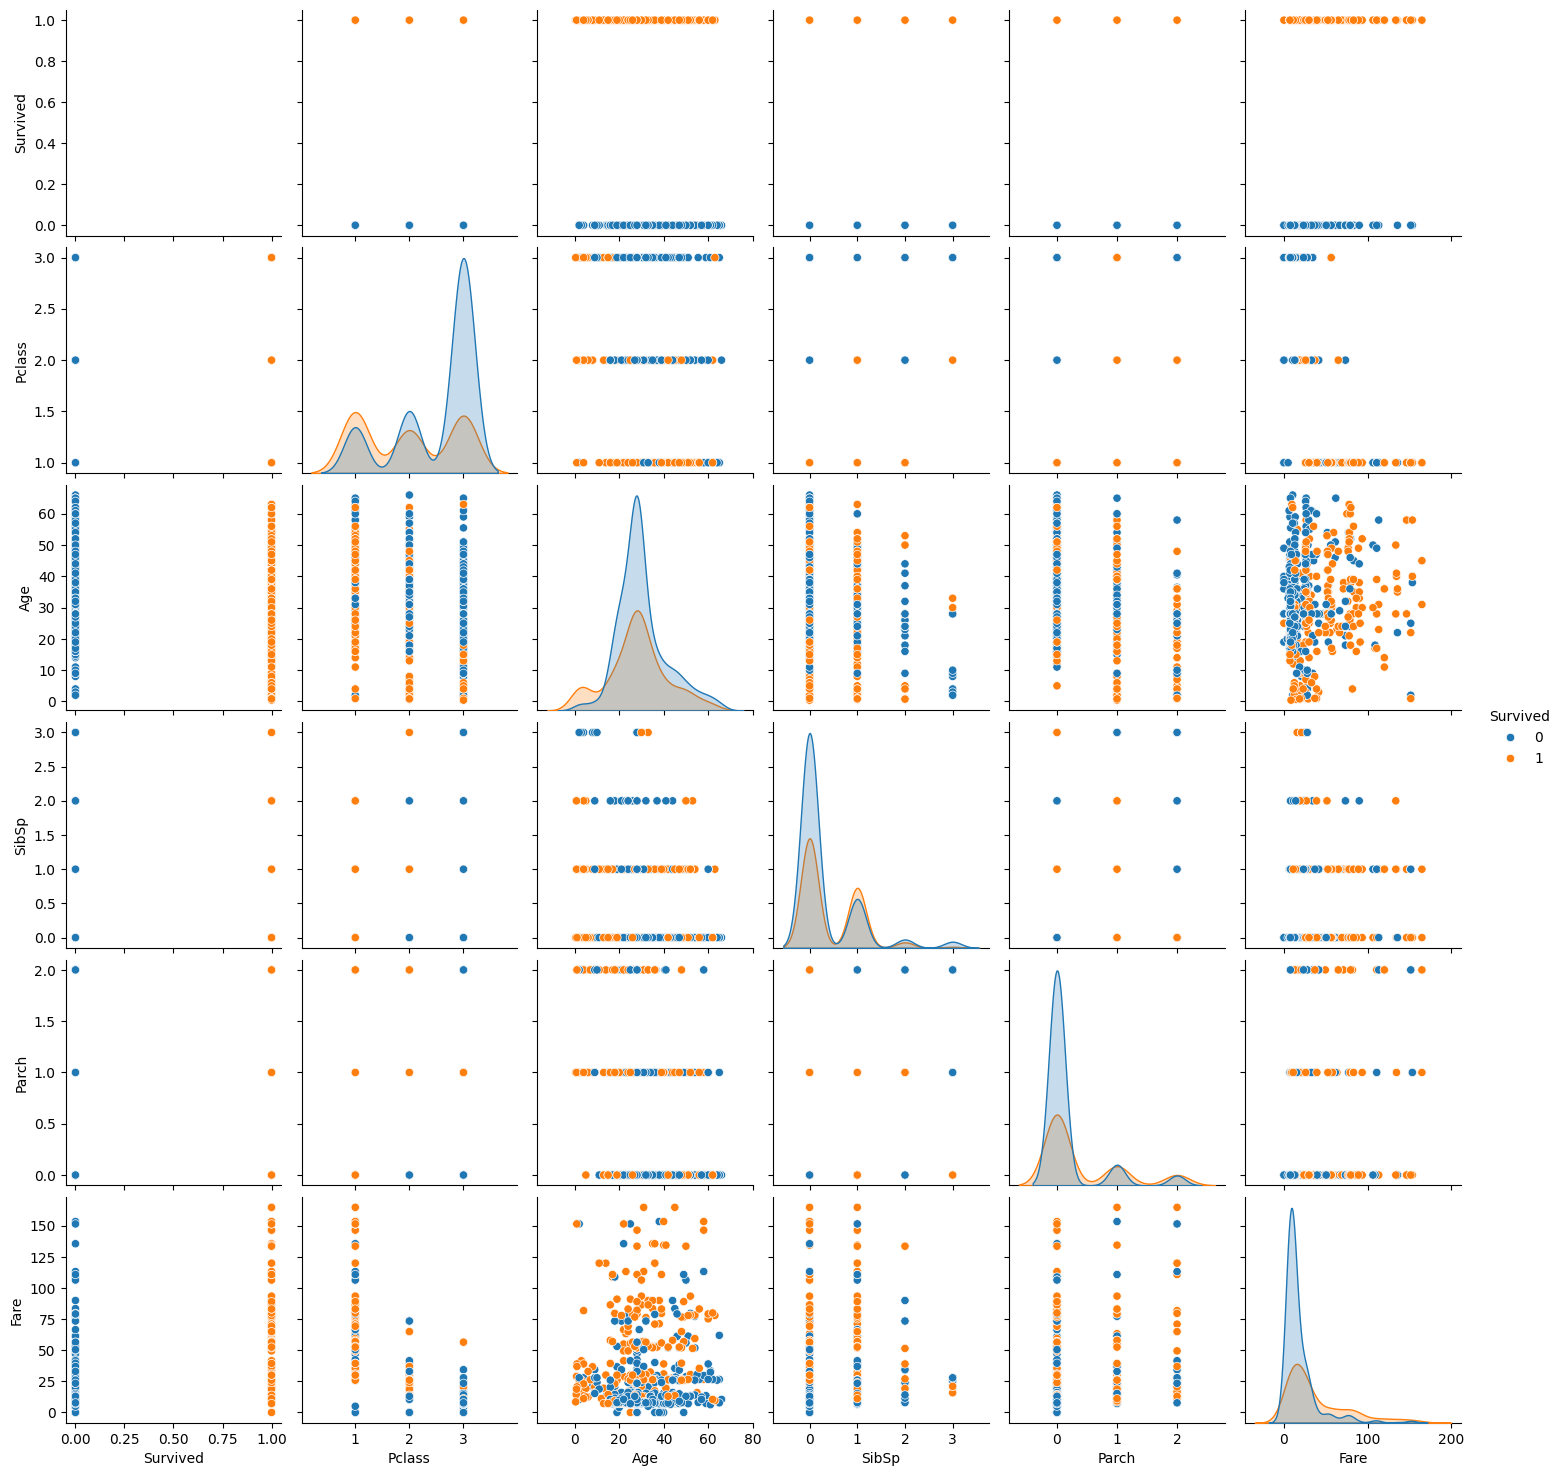

In [ ]:
cols = train.select_dtypes(exclude=['object']).columns
# Building scatter plots
sns.pairplot(data=train, hue='Survived', vars=cols)
plt.show()

In [ ]:
# Removing duplicate rows
train = train.drop_duplicates()
test = test.drop_duplicates()
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Other
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,28.0,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


In [ ]:
# Convert columns in the training dataset to categorical type
train[categorical_columns] = train[categorical_columns].astype('category')
# Convert columns in the test dataset to categorical type
test[categorical_columns] = test[categorical_columns].astype('category')

In [ ]:
# Perform one-hot encoding for categorical data
train = pd.get_dummies(train, columns=categorical_columns, drop_first=True, dtype=int)
test = pd.get_dummies(test, columns=categorical_columns, drop_first=True, dtype=int)
train

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1,0,0,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,1,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0,1,0,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,0,1,0,0,0,1,1,0
887,1,19.0,0,0,30.0000,0,0,1,1,0,0,0,0,0
888,0,28.0,1,2,23.4500,0,0,1,1,0,0,0,0,1
889,1,26.0,0,0,30.0000,1,0,0,0,1,0,0,0,0


In [ ]:
target_df = train['Survived']
X_df = train.drop(['Survived'], axis=1, inplace=False)

In [ ]:
X_df.shape, target_df.shape

((714, 13), (714,))

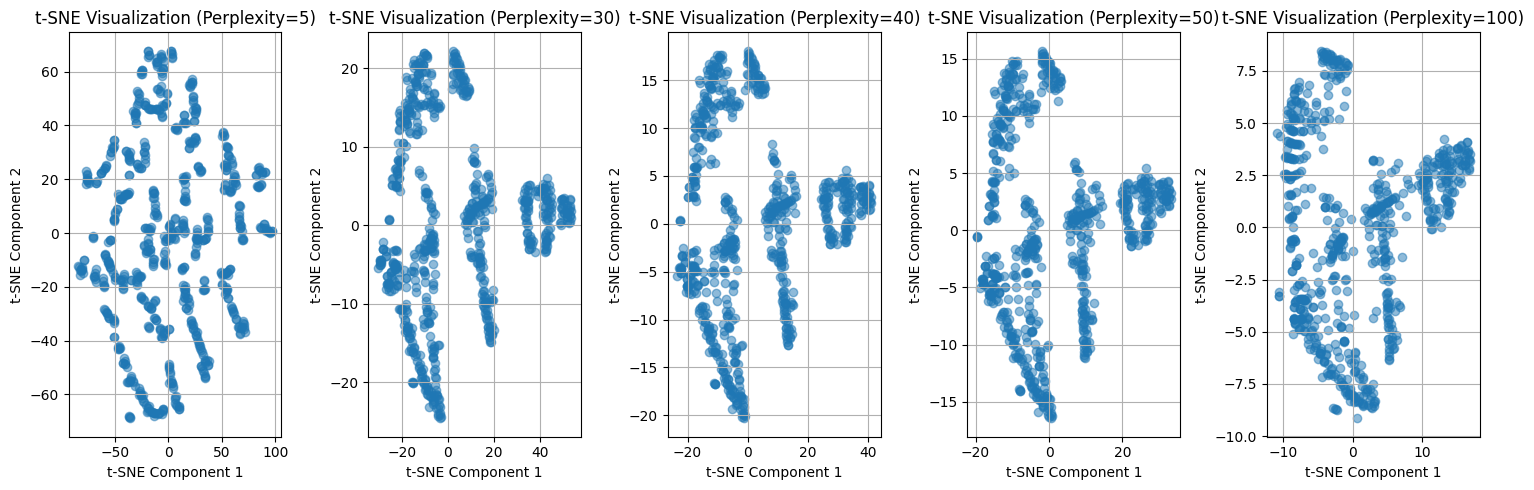

In [ ]:
# Perplexity values we want to test
perplexities = [5, 30, 40, 50, 100]

# Scatter plot for each perplexity value
plt.figure(figsize=(15, 5))
for i, perplexity in enumerate(perplexities):
    # Initialize t-SNE model with specified perplexity
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    # Apply t-SNE to our data
    tsne_result = tsne.fit_transform(X_df)
    # Display the results
    plt.subplot(1, len(perplexities), i + 1)
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
    plt.title(f't-SNE Visualization (Perplexity={perplexity})')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.grid(True)

plt.tight_layout()
plt.show()

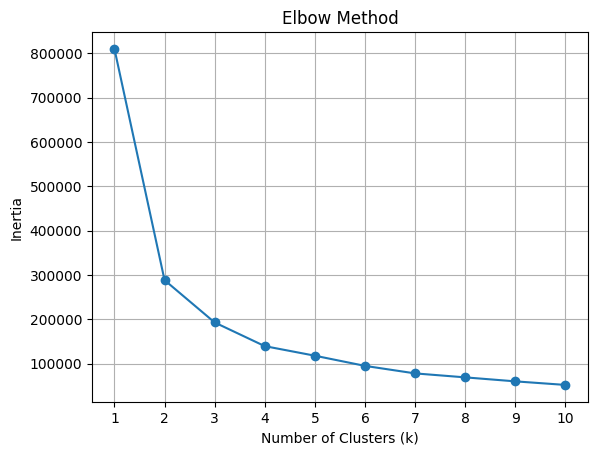

In [ ]:
# Values of k we want to test
k_values = range(1, 11)
# Sum of squared distances to centroids for each k value
inertia_values = []

# Running KMeans for each k value and computing the sum of squared distances
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_df)
    inertia_values.append(kmeans.inertia_)

# Plotting the graph
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

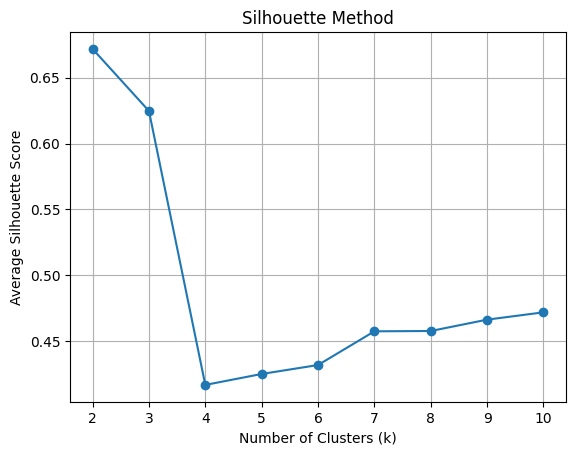

In [ ]:
# Values of k we want to test
k_values = range(2, 11)
# List to store silhouette scores for each k value
silhouette_scores = []

# Running KMeans for each k value and computing silhouette score
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_df)
    silhouette_avg = silhouette_score(X_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the graph
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

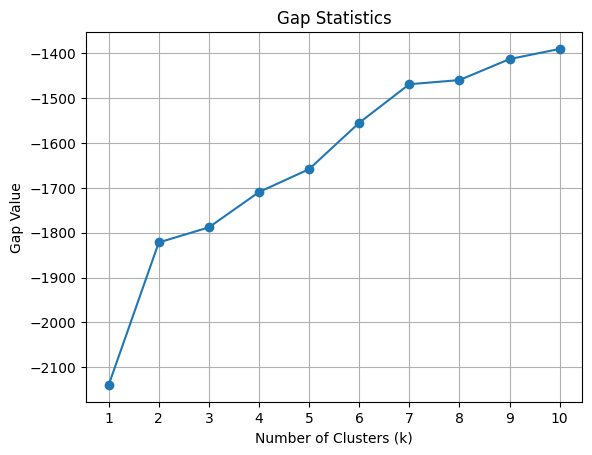

In [ ]:
def compute_gap(train_data, k_max=10, n_refs=5):
    # Values of k to evaluate
    k_values = range(1, k_max + 1)
    # Array to store gap statistics values
    gap_values = np.zeros((len(k_values),))

    for i, k in enumerate(k_values):
        # Creating a KMeans model with k clusters
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(train_data)
        # Computing intra-cluster distances
        cluster_distances = kmeans.transform(train_data)
        # Computing the sum of logarithms of intra-cluster distances
        log_wks = np.sum(np.log(cluster_distances[np.arange(len(train_data)), kmeans.labels_]))

        # Creating n_refs random datasets and computing the sum of intra-cluster distances for them
        ref_log_wks = []
        for _ in range(n_refs):
            # Generating random data
            random_data = np.random.random_sample(size=train_data.shape)
            # Creating a KMeans model with k clusters and computing intra-cluster distances
            kmeans_ref = KMeans(n_clusters=k, random_state=42)
            kmeans_ref.fit(random_data)
            ref_cluster_distances = kmeans_ref.transform(random_data)
            # Computing the sum of logarithms of intra-cluster distances
            ref_log_wks.append(np.sum(np.log(ref_cluster_distances[np.arange(len(random_data)), kmeans_ref.labels_])))

        # Computing the mean value of logarithms of intra-cluster distances for random datasets
        ref_log_wks = np.array(ref_log_wks)
        mean_ref_log_wks = np.mean(ref_log_wks)

        # Computing the gap statistic
        gap_values[i] = mean_ref_log_wks - log_wks

    return gap_values

# Computing gap statistics
gap_values = compute_gap(X_df, k_max=10)

# Plotting the graph
plt.plot(range(1, 11), gap_values, marker='o')
plt.title('Gap Statistics')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Gap Value')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [ ]:
def doAgglomerative(X, nclust=2, linkage='ward'):
    # Create an Agglomerative Clustering model with specified number of clusters and linkage method
    model = AgglomerativeClustering(n_clusters=nclust, linkage=linkage)
    # Fit the model and predict cluster labels for the input data
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

# Perform Agglomerative Clustering on the input data
clust_labels1 = doAgglomerative(X_df)
# Create a DataFrame to store the cluster labels
agglomerative = pd.DataFrame(clust_labels1)

In [ ]:
clust_labels2 = doAgglomerative(X_df, 3)
# Perform Agglomerative Clustering with 3 clusters on the input data
agglomerative2 = pd.DataFrame(clust_labels2)

In [ ]:
def doKmeans(X, nclust=2):
    # Create a KMeans model with the specified number of clusters
    model = KMeans(nclust)
    # Fit the model to the data and predict cluster labels
    clust_labels = model.fit_predict(X)
    # Get the cluster centers
    cent = model.cluster_centers_
    return (clust_labels, cent)

# Perform KMeans clustering with 2 clusters on the input data
clust_labelsK2, centK2 = doKmeans(X_df, 2)
# Create a DataFrame to store the cluster labels
kmeansK2 = pd.DataFrame(clust_labelsK2)

In [ ]:
clust_labelsK3, centK3 = doKmeans(X_df, 3)
# Perform KMeans clustering with 3 clusters on the input data
kmeansK3 = pd.DataFrame(clust_labelsK3)

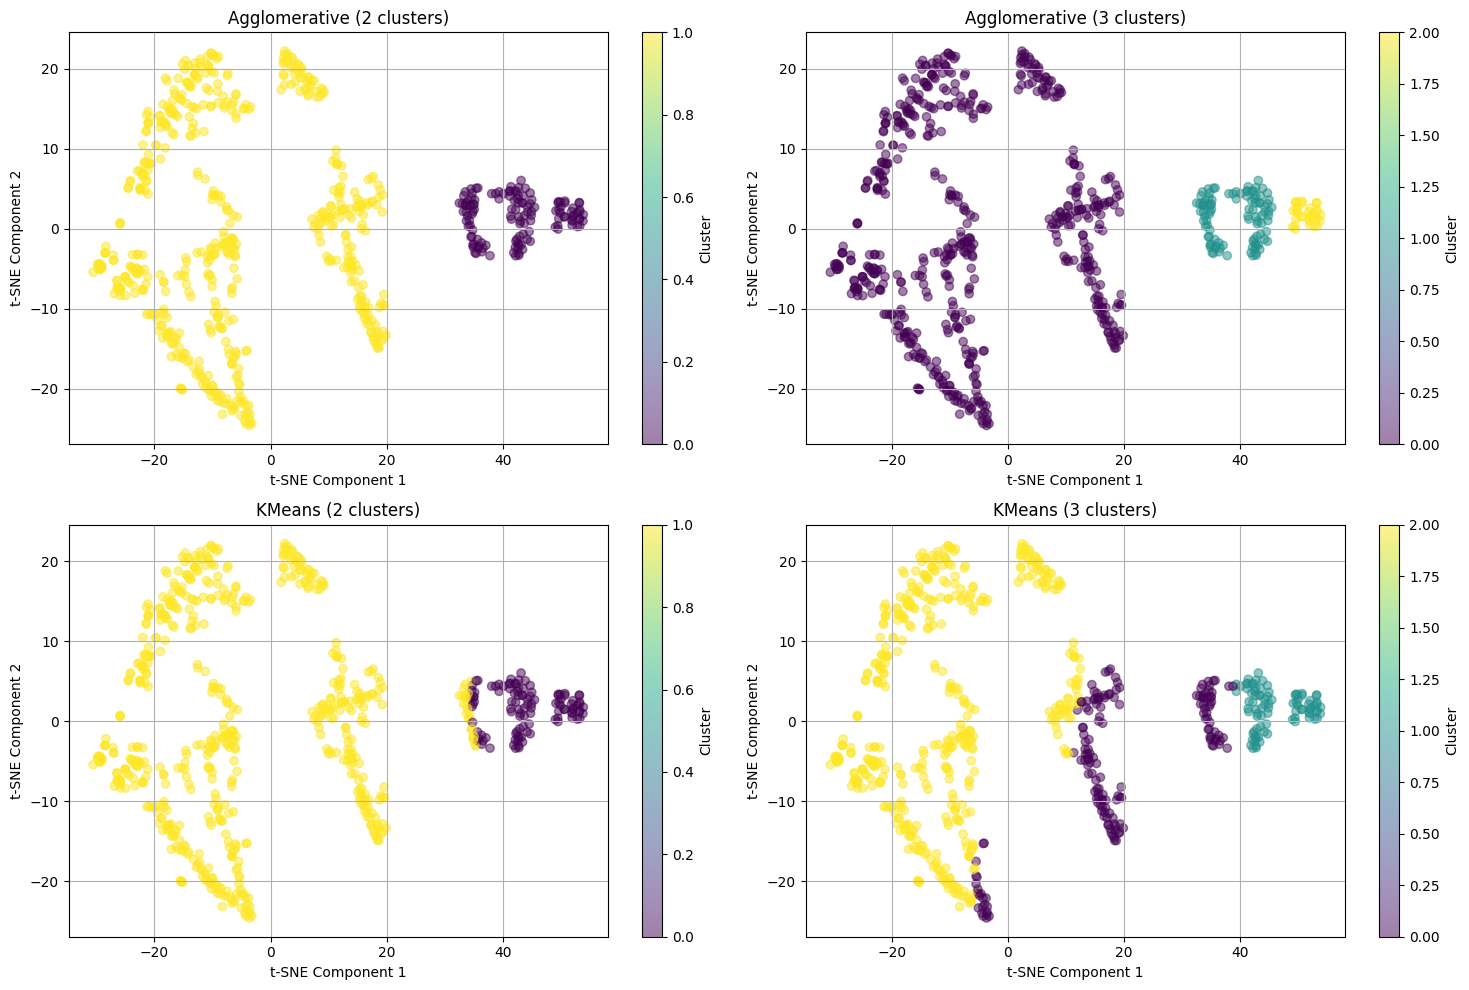

In [ ]:
# List to store cluster labels
cluster_labels_list = [clust_labels1, clust_labels2, clust_labelsK2, clust_labelsK3]
# List of clustering methods
methods = ['Agglomerative (2 clusters)', 'Agglomerative (3 clusters)', 'KMeans (2 clusters)', 'KMeans (3 clusters)']
# Create a figure for the plots
plt.figure(figsize=(15, 10))

# Iterate over each clustering method and its labels
for i, (labels, method) in enumerate(zip(cluster_labels_list, methods), 1):
    # Apply t-SNE for visualization
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(X_df)

    # Add a subplot
    plt.subplot(2, 2, i)

    # Visualize the results with cluster labels
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis', alpha=0.5)

    # Set title and axis labels
    plt.title(method)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.colorbar(label='Cluster')
    plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
# List to store silhouette scores
silhouette_scores = []

# Iterate over each clustering method and its labels
for labels in cluster_labels_list:
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_df, labels)
    silhouette_scores.append(silhouette_avg)

# Print the results
for method, score in zip(methods, silhouette_scores):
    print(f"Silhouette score for {method}: {score}")

Silhouette score for Agglomerative (2 clusters): 0.6690310758716463
Silhouette score for Agglomerative (3 clusters): 0.6274557452106212
Silhouette score for KMeans (2 clusters): 0.6798983005769477
Silhouette score for KMeans (3 clusters): 0.4543767934693955
